In [1]:
import pandas as pd
import json
import numpy as np
from glob import glob
from tqdm import tqdm

rdir = '../results_pmlb_r1/'

# load data from json

In [2]:
frames = []
comparison_cols = [
    'dataset',
    'algorithm',
    'random_state',
    'time_time',
    'model_size',
    'symbolic_model',
    'r2_test',
    'mse_test',
    'mae_test'
]
fails = []
import pdb
for f in tqdm(glob(rdir + '/*/*Operon*.json')):
    if 'cv_results' in f: 
        continue
    try: 
        r = json.load(open(f,'r'))
        if isinstance(r['symbolic_model'],list):
#             print(f)
            sm = ['B'+str(i)+'*'+ri for i, ri in enumerate(r['symbolic_model'])]
            sm = '+'.join(sm)
            r['symbolic_model'] = sm
            
        sub_r = {k:v for k,v in r.items() if k in comparison_cols}
    #     df = pd.DataFrame(sub_r)
        frames.append(sub_r) 
    #     print(f)
    #     print(r.keys())
    except Exception as e:
        fails.append([f,e])
        pass
    
print('fails:',fails)
# df_results = pd.concat(frames)
df_results = pd.DataFrame.from_records(frames)
# cleanup
df_results = df_results.rename(columns={'time_time':'training time (s)'})
#TODO: remove 'Regressor' from names
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Regressor','')) 

# save so we don't have to load again
# df_results.to_feather(rdir.replace('.','').replace('/','')+'.feather')

100%|██████████| 1132/1132 [00:00<00:00, 9432.74it/s]

fails: [['../results_pmlb_r1/623_fri_c4_1000_10/623_fri_c4_1000_10_OperonRegressor_860.json', JSONDecodeError('Expecting value: line 1 column 1 (char 0)')], ['../results_pmlb_r1/654_fri_c0_500_10/654_fri_c0_500_10_OperonRegressor_15795.json', JSONDecodeError('Expecting value: line 1 column 1 (char 0)')], ['../results_pmlb_r1/654_fri_c0_500_10/654_fri_c0_500_10_OperonRegressor_21575.json', JSONDecodeError('Expecting value: line 1 column 1 (char 0)')], ['../results_pmlb_r1/654_fri_c0_500_10/654_fri_c0_500_10_OperonRegressor_23654.json', JSONDecodeError('Expecting value: line 1 column 1 (char 0)')], ['../results_pmlb_r1/654_fri_c0_500_10/654_fri_c0_500_10_OperonRegressor_5390.json', JSONDecodeError('Expecting value: line 1 column 1 (char 0)')], ['../results_pmlb_r1/654_fri_c0_500_10/654_fri_c0_500_10_OperonRegressor_860.json', JSONDecodeError('Expecting value: line 1 column 1 (char 0)')], ['../results_pmlb_r1/banana/banana_OperonRegressor_11284.json', JSONDecodeError('Expecting value: lin

# reload data from feather

In [3]:
# df_results = pd.read_feather(rdir.replace('.','').replace('/','')+'.feather')

In [4]:
# additional metadata
df_results['symbolic_dataset'] = df_results['dataset'].apply(lambda x: True if ('feynman' in x
                                                                                or 'strogatz' in x
                                                                               ) else False)
symbolic_algs = [
    'AFP', 
    'BSR',
    'DSR',
    'FFX',
    'FEAT',
    'FE_AFP',
    'EPLEX',
    'GPGOMEA',
    'gplearn',
    'ITEA', 
    'MRGP', 
    'Operon',
    'sembackpropgp'
]
df_results['symbolic_alg'] = df_results['algorithm'].apply(lambda x: x in symbolic_algs)

In [5]:
df_results


,dataset,algorithm,random_state,training time (s),model_size,symbolic_model,mse_test,mae_test,r2_test,symbolic_dataset,symbolic_alg
0,1027_ESL,Operon,6265,517.903146,47,((-0.000) + (1.000 * (((((0.320 * X3) + (0.575...,2.910184e-01,4.182182e-01,0.858706,False,True
1,1028_SWD,Operon,15795,930.714792,45,((-0.018) + (1.018 * (sin(((((tanh(((-1.175) *...,4.023174e-01,5.007342e-01,0.358959,False,True
2,1028_SWD,Operon,29802,962.177072,41,(0.000 + (0.992 * (((exp((0.238 * X10)) + (0.0...,4.054019e-01,5.292361e-01,0.400563,False,True
3,1028_SWD,Operon,5390,929.815716,51,(0.060 + (1.008 * (((0.277 * X3) + (0.080 * X7...,4.110055e-01,5.111362e-01,0.330715,False,True
4,1029_LEV,Operon,11964,905.353482,49,((-0.001) + (1.000 * ((((0.602 * X2) + (((-4.5...,3.807917e-01,5.008698e-01,0.588166,False,True
...,...,...,...,...,...,...,...,...,...,...,...
614,strogatz_shearflow2,Operon,23654,434.146516,39,(0.112 + (1.044 * ((sin((exp(sin(((-2.578) * X...,6.525063e-04,1.602584e-02,0.990268,True,True
615,strogatz_vdp1,Operon,15795,486.408414,73,(0.000 + (1.000 * ((((((-0.115) + 0.359) * (2....,4.045266e-10,1.483413e-05,1.000000,True,True
616,strogatz_vdp1,Operon,6265,510.914098,94,((-0.001) + (1.000 * (((0.516 * X1) + (((((((-...,2.342809e-04,9.642306e-03,0.999941,True,True
617,strogatz_vdp2,Operon,23654,211.289212,19,((-0.000) + (1.000 * (((((-1.325) * X1) + (-3....,3.612547e-14,1.585399e-07,1.000000,True,True


In [6]:
df_results.groupby('algorithm').nunique().reset_index().sort_values(by='dataset',ascending=False)

,algorithm,dataset,random_state,training time (s),model_size,symbolic_model,mse_test,mae_test,r2_test,symbolic_dataset,symbolic_alg
0,Operon,145,10,619,73,619,619,619,618,2,1


In [7]:
df_results.columns

# for (dataset, alg), dfg in df_results.groupby(['dataset','algorithm']):
for dataset, dfg in df_results.groupby('dataset'):
    print(len(dfg),'results for',dataset)
for alg, dfg in df_results.groupby('algorithm'):
    print(len(dfg),'results for',alg)
    
    
df_results.describe()

1 results for 1027_ESL
3 results for 1028_SWD
10 results for 1029_LEV
1 results for 1030_ERA
10 results for 1096_FacultySalaries
1 results for 1191_BNG_pbc
1 results for 1193_BNG_lowbwt
10 results for 1196_BNG_pharynx
2 results for 1199_BNG_echoMonths
1 results for 1201_BNG_breastTumor
1 results for 192_vineyard
2 results for 201_pol
10 results for 215_2dplanes
10 results for 218_house_8L
1 results for 225_puma8NH
1 results for 227_cpu_small
2 results for 228_elusage
2 results for 229_pwLinear
1 results for 294_satellite_image
1 results for 344_mv
1 results for 503_wind
1 results for 505_tecator
1 results for 522_pm10
1 results for 523_analcatdata_neavote
2 results for 527_analcatdata_election2000
1 results for 537_houses
3 results for 542_pollution
1 results for 547_no2
1 results for 556_analcatdata_apnea2
1 results for 557_analcatdata_apnea1
1 results for 560_bodyfat
1 results for 579_fri_c0_250_5
10 results for 581_fri_c3_500_25
1 results for 583_fri_c1_1000_50
1 results for 586_fri

,random_state,training time (s),model_size,mse_test,mae_test,r2_test
count,619.000000,619.000000,619.000000,6.190000e+02,6.190000e+02,6.190000e+02
mean,14862.297254,9193.855211,70.667205,1.227457e+74,3.672399e+35,-1.186458e+74
std,8844.526481,7544.456409,22.587673,3.053763e+75,9.135860e+36,2.950960e+75
min,860.000000,163.168899,5.000000,3.419260e-17,4.406068e-09,-7.341905e+76
25%,6265.000000,516.639539,47.000000,1.134667e-06,7.669476e-04,9.353176e-01
50%,11964.000000,11573.043483,81.000000,2.193296e-02,1.134972e-01,9.896263e-01
75%,22118.000000,16064.104613,91.000000,2.432939e-01,3.412365e-01,9.999999e-01
max,29802.000000,22726.278765,102.000000,7.597675e+76,2.272976e+38,1.000000e+00


## summarize results by dataset, including ranking

In [8]:
## summarize results by dataset, including ranking
# get alg count
df_results2 = df_results.merge(df_results.groupby('dataset')['algorithm'].nunique().reset_index(),
                              on='dataset',suffixes=('','_count'))

df_results2['solution'] = df_results2['r2_test'].apply(lambda x: x > 0.9999).astype(float)
df_results2.loc[df_results2.symbolic_dataset==False,'solution'] = np.nan
                                        
for col in [c for c in df_results2.columns if c.endswith('test') or c.endswith('size')]:
    ascending = 'r2' not in col
    df_results2[col+'_rank']=df_results2.groupby(['dataset','random_state'])[col].apply(lambda x: 
                                                                              round(x,3).rank(
                                                                              ascending=ascending).astype(int))
    
df_sum = df_results2.groupby(['algorithm','dataset'],as_index=False).median()

df_results = df_results2
df_sum

,algorithm,dataset,random_state,training time (s),model_size,mse_test,mae_test,r2_test,symbolic_dataset,symbolic_alg,algorithm_count,solution,model_size_rank,mse_test_rank,mae_test_rank,r2_test_rank
0,Operon,1027_ESL,6265.0,517.903146,47.0,2.910184e-01,4.182182e-01,0.858706,False,True,1.0,NaN,1.0,1.0,1.0,1.0
1,Operon,1028_SWD,15795.0,930.714792,45.0,4.054019e-01,5.111362e-01,0.358959,False,True,1.0,NaN,1.0,1.0,1.0,1.0
2,Operon,1029_LEV,13879.5,933.058744,51.0,4.121132e-01,4.964344e-01,0.546702,False,True,1.0,NaN,1.0,1.0,1.0,1.0
3,Operon,1030_ERA,11284.0,947.155268,47.0,2.380059e+00,1.215806e+00,0.305655,False,True,1.0,NaN,1.0,1.0,1.0,1.0
4,Operon,1096_FacultySalaries,13879.5,172.191406,47.0,9.635914e-01,3.501308e-01,0.952218,False,True,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Operon,strogatz_predprey1,13879.5,498.712062,81.0,1.061323e-07,2.222239e-04,1.000000,True,True,1.0,1.0,1.0,1.0,1.0,1.0
141,Operon,strogatz_predprey2,6265.0,627.217390,80.0,3.270122e-08,1.416725e-04,1.000000,True,True,1.0,1.0,1.0,1.0,1.0,1.0
142,Operon,strogatz_shearflow2,23654.0,434.146516,39.0,6.525063e-04,1.602584e-02,0.990268,True,True,1.0,0.0,1.0,1.0,1.0,1.0
143,Operon,strogatz_vdp1,11030.0,498.661256,83.5,1.171407e-04,4.828570e-03,0.999970,True,True,1.0,1.0,1.0,1.0,1.0,1.0


# plot comparisons

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare(df_compare, x='r2_test',y='algorithm', row=None, col=None, scale=None, xlim=[]):
    plt.figure()
    order = df_compare.groupby(y)[x].median().sort_values().index
    if scale=='log' and len(xlim)>0 and xlim[0] == 0:
        df_compare.loc[:,x] += 1
        xlim[0] = 1
        xnew = '1 + '+x
        df_compare=df_compare.rename(columns={x:xnew})
        x = xnew
    
    sns.catplot(data=df_compare, 
                kind='box',
#                 color='w',
                y=y,
                x=x,
                order=order,
                fliersize=0,
#                 notch=True,
                col=col,
                palette='flare_r'
               )
#     xmax = df_compare[x].quantile(0.75)
#     xmin = 0 #df_compare[x].quantile(0.9)
    plt.ylabel('')
    if len(xlim)>0:
        plt.xlim(xlim[0],xlim[1])
    if scale:
        plt.gca().set_xscale(scale)

<Figure size 432x288 with 0 Axes>

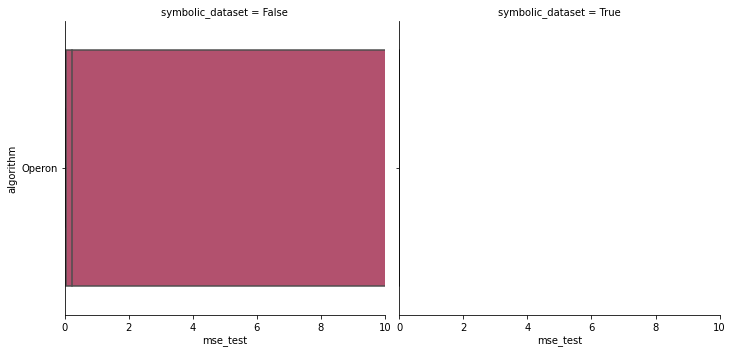

<Figure size 432x288 with 0 Axes>

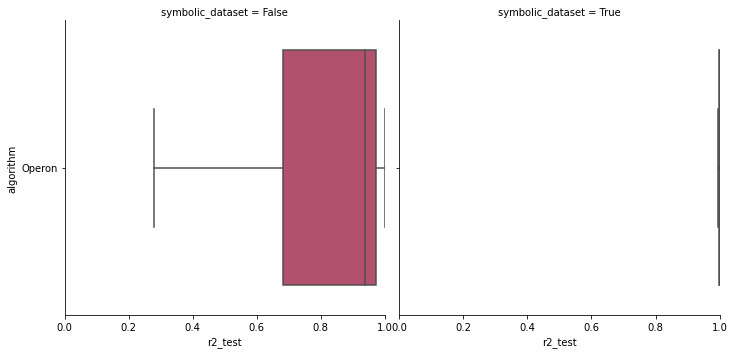

<Figure size 432x288 with 0 Axes>

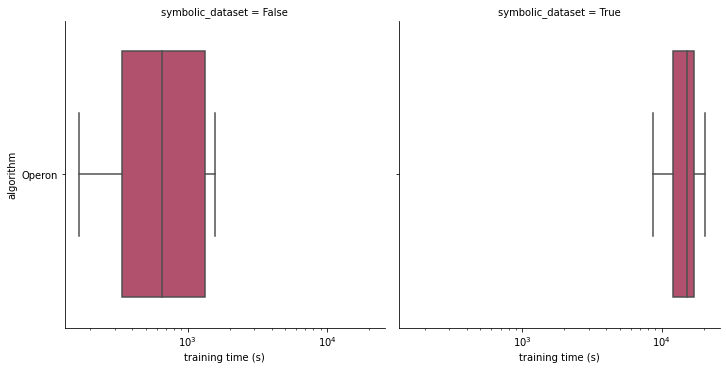

<Figure size 432x288 with 0 Axes>

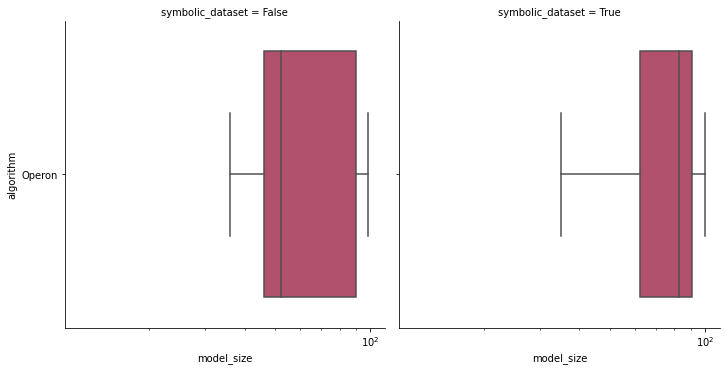

<Figure size 432x288 with 0 Axes>

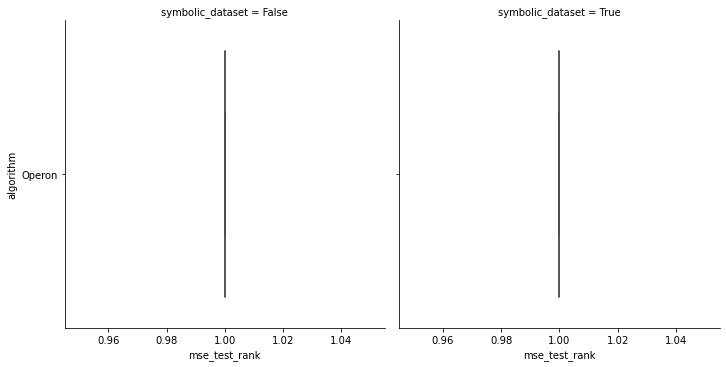

<Figure size 432x288 with 0 Axes>

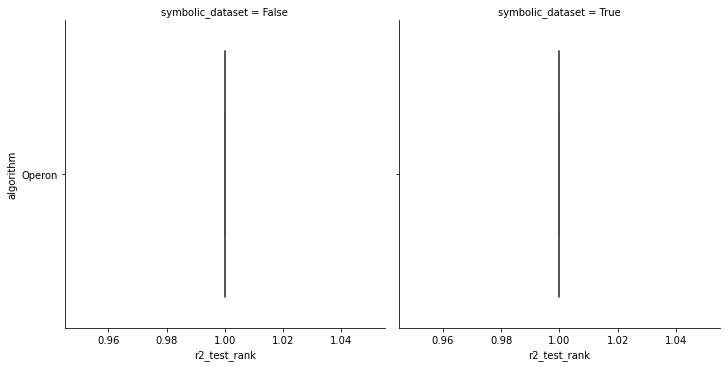

In [10]:
compare(df_sum, x='mse_test', col='symbolic_dataset', xlim=[0,10]) #, scale='log') 
compare(df_sum, x='r2_test', col='symbolic_dataset', xlim=[0,1])
compare(df_sum, x='training time (s)', scale='log', col='symbolic_dataset')
compare(df_sum, x='model_size', scale='log', col='symbolic_dataset')
compare(df_sum, x='mse_test_rank', col='symbolic_dataset') 
compare(df_sum, x='r2_test_rank', col='symbolic_dataset')

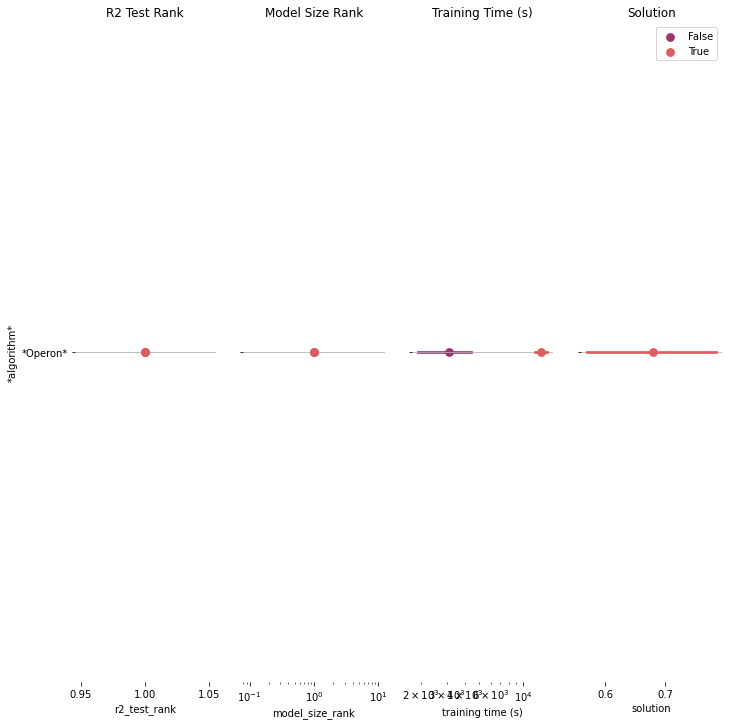

In [11]:
# Make the PairGrid
df_plot = df_sum.copy()
df_plot['*algorithm*'] = df_plot['algorithm'].apply(lambda x: '*'+x+'*' if x in symbolic_algs else x)
order = df_plot.groupby('*algorithm*')['r2_test'].median().sort_values().index

x_vars=[
#         'mse_test',
        'r2_test_rank',
        'model_size_rank',
        'training time (s)',
    'solution'
]
g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['*algorithm*'],
                 height=10, 
                 aspect=.25,
                 hue='symbolic_dataset'
                )

# Draw a dot plot using the stripplot function
# g.map(sns.stripplot, size=10, orient="h", jitter=False, order=order, alpha=0.1,
#       palette="flare_r", linewidth=1, edgecolor="w")
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="flare_r",
      linewidth=1,
      join=False
     )
plt.legend()
# Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# # Use semantically meaningful titles for the columns
# titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
#           "Not distracted crashes", "No previous crashes"]
titles = [x.replace('_',' ').title().replace('(S)','(s)') for x in x_vars]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')

    # Make the grid horizontal instead of vertical
#     ax.xaxis.grid(True)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='Count', ylabel='model_size_rank'>

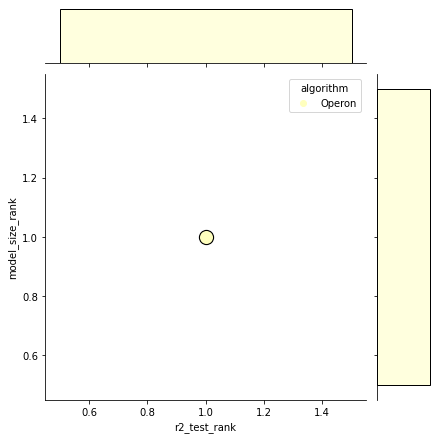

In [12]:
# plt.figure(figsize=(10,10))
data = df_results.loc[df_results.symbolic_alg==True].copy()
data = data.merge(data.groupby('algorithm')['r2_test_rank'].mean().reset_index(),
                  on='algorithm',suffixes=('','_median')
                 )
data = data.merge(data.groupby('algorithm')['model_size_rank'].mean().reset_index(),
                  on='algorithm',suffixes=('','_median')
                 )
# data['log_model_size'] = data['model_size'].apply(np.log)
# data.loc[data.r2_test<-1.0, 'r2_test'] = -1.0
# g = sns.jointplot(
#     data = data, #.groupby('algorithm').median(),
#     x = 'r2_test_rank',
#     y = 'model_size_rank',
#     hue = 'algorithm',
# #     kind="kde",
#     kind='scatter',
# #     joint_kws = dict(data=data.groupby('algorithm').median(), s=200,style='algorithm'),
#     palette='viridis'
# )
g = sns.JointGrid()

sns.scatterplot(
    ax = g.ax_joint,
    data = data.groupby('algorithm').mean(),
    x = 'r2_test_rank',
    y = 'model_size_rank',
    style='algorithm',
    hue = 'algorithm',
    s=200,
    palette='Spectral',
    edgecolor='k'
)
# sns.pointplot(
#     ax = g.ax_joint,
#     data = data,
#     x = 'r2_test_rank_median',
#     y = 'model_size_rank',
#     orient='v',
#     style='algorithm',
#     hue = 'algorithm',
#     join=False,
#     palette='Spectral',
#     legend=False,
#     markers=''
# )
# sns.pointplot(
#     ax = g.ax_joint,
#     data = data,
#     x = 'r2_test_rank',
#     y = 'model_size_rank_median',
#     orient='h',
#     style='algorithm',
#     hue = 'algorithm',
#     join=False,
#     palette='Spectral',
#     legend=False,
#     markers=''
# )
# sns.pointplot(
#     ax = g.ax_joint,
#     data = data,
#     x = 'r2_test_rank',
#     y = 'model_size_rank',
#     style='algorithm',
#     hue = 'algorithm',
#     join=False,
#     palette='Spectral',
#     legend=False
# )
# sns.scatterplot(
#     ax = g.ax_joint,
#     data = data,
#     x = 'r2_test_rank',
#     y = 'model_size_rank',
#     style='algorithm',
#     hue = 'algorithm',
#     s=200,
#     alpha=0.005,
#     palette='Spectral',
#     legend=False
# )
hist_args = dict(
    data=data,
    hue='algorithm',
    legend=False,
    discrete=True,
    palette='Spectral',
#     multiple='fill'
#     fill=False
)
sns.histplot(
    ax = g.ax_marg_x,
    x = 'r2_test_rank',
    **hist_args
)
sns.histplot(
    ax = g.ax_marg_y,
    y = 'model_size_rank',
    **hist_args
)
# g.ax_joint.legend(loc=[1.2,.5])
# plt.gca().set_yscale('log')
# plt.xlim(0.5, 1.1)

In [13]:
dir(g)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_hue_params',
 '_inject_kwargs',
 'ax_joint',
 'ax_marg_x',
 'ax_marg_y',
 'fig',
 'hue',
 'plot',
 'plot_joint',
 'plot_marginals',
 'savefig',
 'set_axis_labels',
 'x',
 'y']